In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv("/kaggle/input/apple-stock-data/AAPL.csv")

In [4]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [11]:
new_df=df.drop(columns=["Unnamed: 0","Date"])

In [12]:
new_df

Open        High         Low       Close     Volume  Year  Month  \
0        0.099058    0.099488    0.099058    0.099058  469033600  1980     12   
1        0.094321    0.094321    0.093890    0.093890  175884800  1980     12   
2        0.087429    0.087429    0.086999    0.086999  105728000  1980     12   
3        0.089152    0.089582    0.089152    0.089152   86441600  1980     12   
4        0.091737    0.092167    0.091737    0.091737   73449600  1980     12   
...           ...         ...         ...         ...        ...   ...    ...   
10982  227.929993  229.399994  226.369995  228.679993   48076100  2024      7   
10983  229.300003  233.080002  229.250000  232.979996   62627700  2024      7   
10984  231.389999  232.389999  225.770004  227.570007   64710600  2024      7   
10985  228.919998  232.639999  228.679993  230.539993   53008200  2024      7   
10986  236.531998  237.229996  233.089996  234.399994   58409071  2024      7   

       Day  
0       12  
1       15  
2       16  
3       17  
4       18  
...    ...  
10982    9  
10983   10  
10984   11  
10985   12  
10986   15  

[10987 rows x 8 columns]

In [13]:
X=new_df.drop(columns=["Open"])
Y=new_df[[
    "Open"]]

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [18]:
random_reg=RandomForestRegressor(n_estimators=50)
random_reg.fit(X_train,Y_train)
random_reg.score(X_test,Y_test)

/tmp/ipykernel_34/3079594239.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train,Y_train)


0.9999120246526211

In [19]:
y_pred=random_reg.predict(X_test)

In [23]:
plt.plot(X_test,label="X_test")
# plt.plot(y_pred,label="y_pred")
plt.legend()
plt.show()

In [24]:
plt.plot(y_pred,label="y_pred")
# plt.plot(y_pred,label="y_pred")
plt.legend()
plt.show()

heatmap on correlation data

<Axes: >

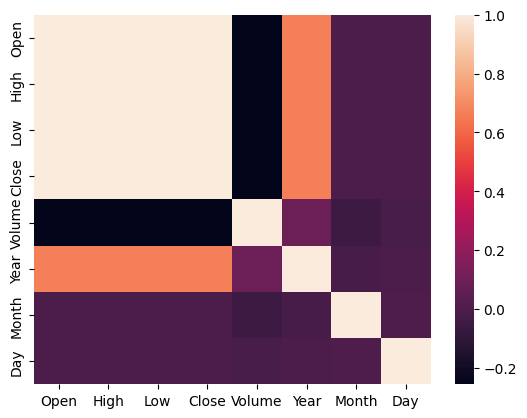

In [27]:
cor=new_df.corr()
sns.heatmap(cor)

heat map on original data

<Axes: >

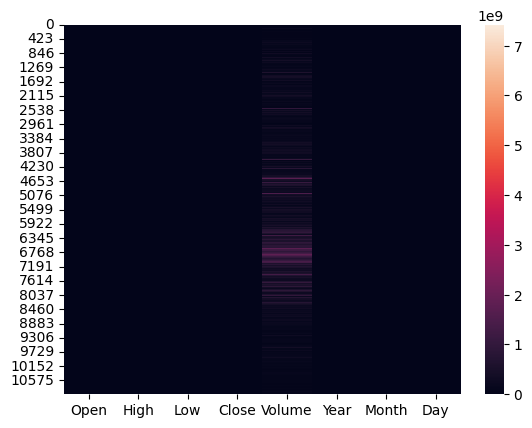

In [28]:
sns.heatmap(new_df)